In [53]:
# import library necessary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
# import nltk

# Zad. 
Wczytaj dane zawierające informacje o piosenkach.

Dane trzeba rozpakować.

https://www.kaggle.com/laowingkin/song-text-mining-and-clustering/data

In [54]:
df = pd.read_csv('songdata.csv')
df['text'] = df['text'].str.replace('\n', '')
df.head(10)

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face And i..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please Touch me gently ..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go Why I had to ...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
5,ABBA,Burning My Bridges,/a/abba/burning+my+bridges_20003011.html,"Well, you hoot and you holler and you make me ..."
6,ABBA,Cassandra,/a/abba/cassandra_20002811.html,Down in the street they're all singing and sho...
7,ABBA,Chiquitita,/a/abba/chiquitita_20002978.html,"Chiquitita, tell me what's wrong You're encha..."
8,ABBA,Crazy World,/a/abba/crazy+world_20003013.html,I was out with the morning sun Couldn't sleep...
9,ABBA,Crying Over You,/a/abba/crying+over+you_20177611.html,I'm waitin' for you baby I'm sitting all alon...


# Zad 2
1. Pogrupować teksty piosenek algorytmami:
    
     * k-średnie, 
     * DBSCAN, 
     * hierarchiczne klastrowanie 
     
2. Sprawdź, które klastrowanie najlepiej odpowiada kolumnie **artist**      
3. Wypisz słowa kluczowe w każdym klastrze     

In [66]:
y = df["artist"].values[:10000]
X = df["text"].values[:10000]


In [76]:
Y_set = df["artist"].values[:10000]

In [77]:
y

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4

In [68]:

d = dict(zip(np.unique(y), range(0, len( np.unique(y) ))))
d

y= df["artist"].map(d, na_action='ignore').values[:1000]

In [69]:
y

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4

In [70]:
# import library necessary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
# import nltk

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string 

def sen2token(sentence):
    return word_tokenize(sentence)

def remove_punctuation(words):
    remove_list =  stopwords.words('english') + list(string.punctuation) + ['--', '."', '!"', '?"', ',"', '``', "''"]
    return [w for w in words if not w in set(remove_list)]

def remove_nummbers(words):
    return [w for w in words if not w.isdigit()]

def to_lower(words):
    return [w.lower() for w in words]

def stemming_tokenizer(words):
    words = sen2token(words)
    words = to_lower(words)    
    words = remove_punctuation(words)
    words = remove_nummbers(words)

    
    stemmer = PorterStemmer()
    return [stemmer.stem(w) for w in words]

#preprocessor działa na całym dokumencie
def my_preprocessing(word):
    return word

tfidf_vectorizer = TfidfVectorizer(preprocessor = my_preprocessing, tokenizer=stemming_tokenizer, stop_words=stopwords.words('english') + list(string.punctuation))

tfidf_vectorizer.fit(X)
# print( tfidf_vectorizer.vocabulary_ )
tfidf_matrix = tfidf_vectorizer.transform(X)
# print(tfidf_matrix.todense())

In [72]:
X = tfidf_matrix.todense()

In [73]:
X.shape

(10000, 28253)

In [74]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2) 
svd.fit(tfidf_matrix)

docs_red = svd.transform(tfidf_matrix) 

docs_red # przeanalizujemy podobienstwo

array([[ 0.2827264 ,  0.01328884],
       [ 0.09620194, -0.01329209],
       [ 0.30927609,  0.10809408],
       ...,
       [ 0.40073957,  0.41437785],
       [ 0.14743895, -0.1126095 ],
       [ 0.29051237, -0.17328482]])

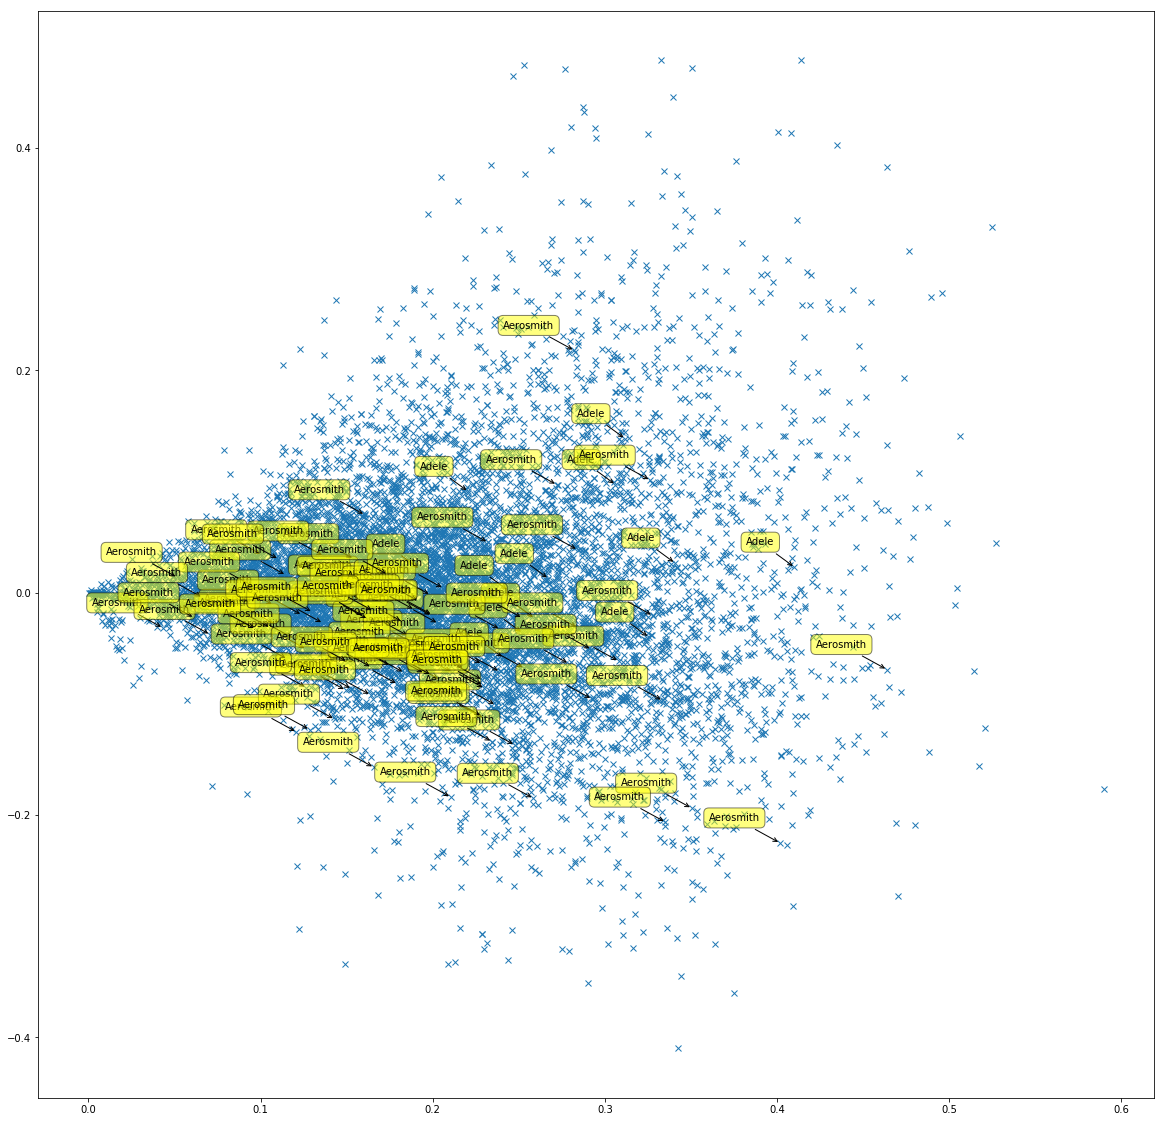

In [84]:

import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))

plt.plot(docs_red[:, 0], docs_red[:, 1], 'x')
labels = Y_set
for label, x, z in zip(labels, docs_red[:, 0], docs_red[:, 1]):
    if( (label =="Adele") or ( label=="Aerosmith")   ):
        plt.annotate(
            label,
            xy=(x, z), xytext=(-20, 20),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()

In [82]:
list(Y_set)

['ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 'ABBA',
 